<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-of-libraries" data-toc-modified-id="Import-of-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import of libraries</a></span></li><li><span><a href="#DataFrame-Import" data-toc-modified-id="DataFrame-Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DataFrame Import</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Firsts-steps" data-toc-modified-id="Firsts-steps-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Firsts steps</a></span></li><li><span><a href="#Relations-with-types-and-Frauds" data-toc-modified-id="Relations-with-types-and-Frauds-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Relations with types and Frauds</a></span></li><li><span><a href="#Fraud-and-not-Fraud-Analysis" data-toc-modified-id="Fraud-and-not-Fraud-Analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fraud and not Fraud Analysis</a></span></li><li><span><a href="#Corr-matrix" data-toc-modified-id="Corr-matrix-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Corr matrix</a></span></li></ul></li></ul></div>

# Import of libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# DataFrame Import

In [3]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

# Exploratory Data Analysis

## Firsts steps

In [4]:
print(df.shape)       # Check the content of the DataFrame
df.tail()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.isna().sum()   #Check that the DF has no null data

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.info() # We can see the type of data we have per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe() # Checking DF statistics

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Una vez vemos los datos y sus estadísticas, empezamos a ver el contenido de las columnas por separado

In [8]:
df.step.value_counts() # Analysing values column by column , This column is hours from 30 days

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [9]:
df.type.value_counts() #Types of mobile finance movements

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
df.amount.value_counts() 

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
91066.95          1
808.61            1
483714.88         1
775343.17         1
223098.05         1
Name: amount, Length: 5316900, dtype: int64

In [11]:
df.nameOrig.value_counts()

C1902386530    3
C1677795071    3
C1784010646    3
C1976208114    3
C2051359467    3
              ..
C64956366      1
C1525219250    1
C320624251     1
C105132909     1
C1455839166    1
Name: nameOrig, Length: 6353307, dtype: int64

In [22]:
df.nameDest.value_counts() # Existen fraudes cometidos por el mismo número de cuenta en varias ocasiones

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M165979982       1
M1698696531      1
M415796310       1
M218502572       1
M592732601       1
Name: nameDest, Length: 2722362, dtype: int64

In [12]:
df.oldbalanceOrg.value_counts()

0.00          2102449
184.00            918
133.00            914
195.00            912
164.00            909
               ...   
396813.93           1
189311.00           1
3355778.65          1
236757.00           1
102899.11           1
Name: oldbalanceOrg, Length: 1845844, dtype: int64

In [13]:
df.newbalanceOrig.value_counts()

0.00          3609566
9011.73             4
7468.59             4
8927.38             4
4019.43             4
               ...   
513900.83           1
6644533.36          1
11633.34            1
1728256.15          1
102899.11           1
Name: newbalanceOrig, Length: 2682586, dtype: int64

In [14]:
df.oldbalanceDest.value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
174945.83            1
2851171.35           1
740725.47            1
76834.40             1
732602.41            1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [15]:
df.newbalanceDest.value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
16532032.16         25
                ...   
350033.41            1
302234.71            1
219824.01            1
808511.54            1
970408.13            1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [41]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [42]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Se observan los valores que existen dentro de cada columna, para poder determinar un análisis posterior

## Relations with types and Frauds

In [43]:
print('Los tipos de casos fraudulentos son {}'.format(
list(df.loc[df.isFraud == 1].type.drop_duplicates())))  

dfFraudTransfer = df.loc[(df.isFraud ==1) & (df.type == 'TRANSFER')]
dfFraudCashOut = df.loc[(df.isFraud ==1) & (df.type == 'CASH_OUT')]
dfFraudPayment = df.loc[(df.isFraud ==1) & (df.type == 'PAYMENT')]
dfFraudCashIn = df.loc[(df.isFraud ==1) & (df.type == 'CASH_IN')]
dfFraudDebit = df.loc[(df.isFraud ==1) & (df.type == 'DEBIT')]




print('El numero de casos fraudulentos TRANSFERS = {}'.format(len(dfFraudTransfer)))
print('El numero de casos fraudulentos CASH_OUT = {}'.format(len(dfFraudCashOut)))
print('El numero de casos fraudulentos PAYMENT = {}'.format(len(dfFraudPayment)))
print('El numero de casos fraudulentos CASH_IN = {}'.format(len(dfFraudCashIn)))
print('El numero de casos fraudulentos DEBIT = {}'.format(len(dfFraudDebit)))

Los tipos de casos fraudulentos son ['TRANSFER', 'CASH_OUT']
El numero de casos fraudulentos TRANSFERS = 4097
El numero de casos fraudulentos CASH_OUT = 4116
El numero de casos fraudulentos PAYMENT = 0
El numero de casos fraudulentos CASH_IN = 0
El numero de casos fraudulentos DEBIT = 0


In [44]:
print('Los tipos de casos FlaggedFraud son {}'.format(
list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))




Los tipos de casos FlaggedFraud son ['TRANSFER']


## Fraud and not Fraud Analysis

In [19]:
fraud = df.loc[df.isFraud == 1]  # Create a variable DF where is Fraud
normal = df.loc[df.isFraud == 0]

In [20]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Quiero ver las relaciones que hay entre las cuentas con fraude, y las cantidades

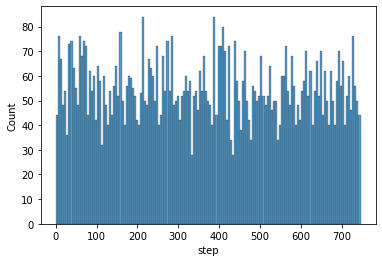

In [36]:
sns.histplot(x=fraud.step, bins=100,binwidth=5); # We observe there are frauds every hour

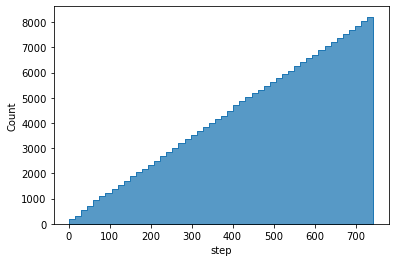

In [39]:
sns.histplot(x=fraud.step, bins=50,element='step', cumulative=True); 

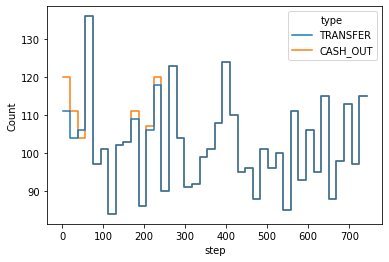

In [44]:
sns.histplot(x=fraud.step, 
             hue=fraud[(fraud.type=='CASH_OUT') | (fraud.type=='TRANSFER')].type,
             bins=40,
            element='step',
            fill=False);

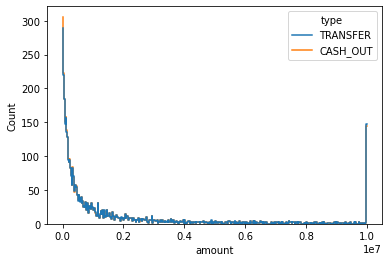

In [51]:
sns.histplot(x=fraud.amount,             # It looks like there are a lot of small amount frauds, and there are also frauds of more than 1M
             hue=fraud[(fraud.type=='CASH_OUT') | (fraud.type=='TRANSFER')].type,
             bins=400,
            element='step',
            fill=False);

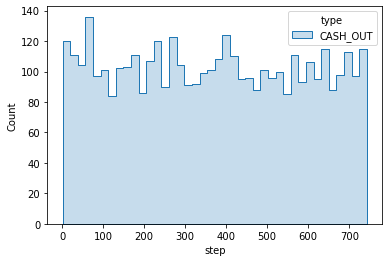

In [46]:
sns.histplot(x=fraud.step, 
             hue=fraud[(fraud.type=='CASH_OUT')].type,
             bins=40,
            element='step');

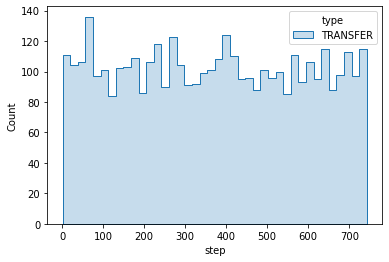

In [47]:
sns.histplot(x=fraud.step, 
             hue=fraud[(fraud.type=='TRANSFER')].type,
             bins=40,
            element='step');

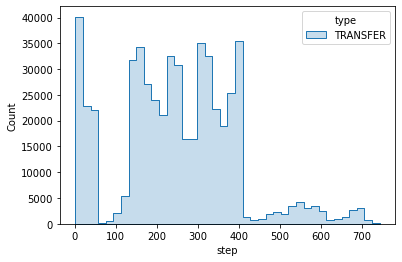

In [49]:
sns.histplot(x=df.step, 
             hue=df[(df.type=='TRANSFER') ].type,
             bins=40,
            element='step');

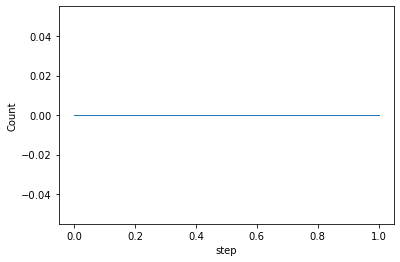

In [57]:
sns.histplot(x=fraud.step, 
             hue=fraud[(fraud.type=='CASH_OUT')& (fraud.type == 'TRANSFER')].type,
             bins=40,
            element='step');

In [59]:
tab=pd.crosstab(fraud.type, fraud.isFraud)

In [60]:
tab

isFraud,1
type,
CASH_OUT,4116
TRANSFER,4097


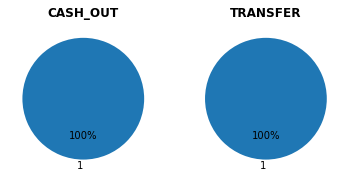

In [66]:
fig, ax = plt.subplots(1,2)   # he definido 2 variables, 1 fila 3 columnas de plots

for i, cate in enumerate(tab.index[:3]):
    
    tab.loc[cate].plot.pie(ax=ax[i],         # ejes
                          autopct='%1.f%%',  # los titulos
                          startangle=90)     # angulo inicial
    ax[i].set_ylabel('')
    ax[i].set_title(cate, fontweight='bold')

## Corr matrix

In [68]:
corr=df.corr()   
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


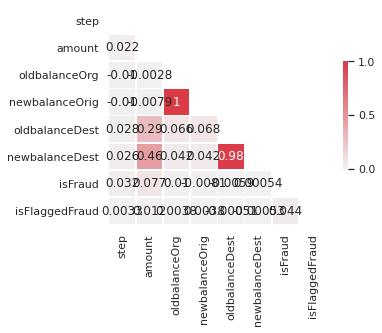

In [70]:
sns.set(style='white')   # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))  # genera una mascara para la triangular superior

color_map=sns.diverging_palette(0, 10, as_cmap=True)  # paleta de colores


sns.heatmap(corr, annot=True,  # mapa de calor
           mask=mascara,
           cmap=color_map,
           vmax=1,  # limite vertical
           center=0, 
           square=True,  # datos como cuadrados
           linewidth=.5, # ancho de linea
           cbar_kws={'shrink': .5}  # barra lateral
           );

Existe una correlación altísima en las columnas Newbalance orig y oldbalance orig, tambien en oldbalanceDest y newbalanceDest, tiene sentido en transacciones, de cuenta A a cuenta B 